# appspot.com

When visualizing the first 1000 lines of CC-MAIN-2020-50 as a network we noticed appspot.com pointing to a bunch of different domains through a web archive. Since that visualization extracted the full hostname it's hard to say what is going on here without looking at the underlying data.[link text](https://)

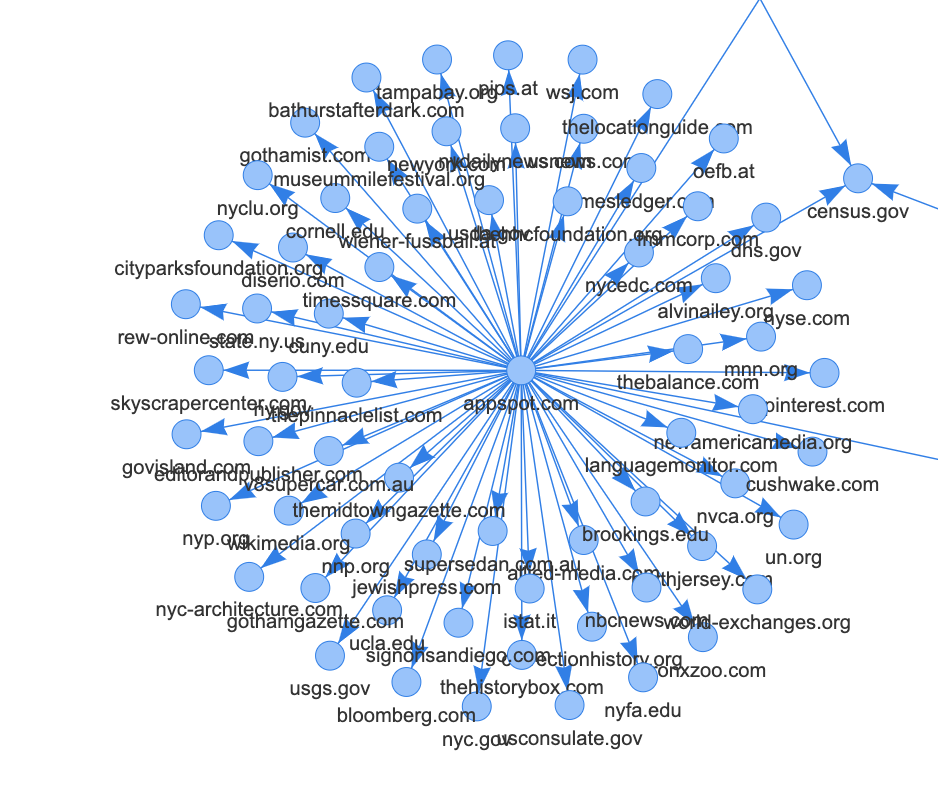

In [1]:
import pandas
pandas.set_option('display.max_colwidth', 0)

df = pandas.read_csv('/content/drive/Shareddrives/SLoWA/CommonCrawl/CC-MAIN-2020-50.csv.gz')
df

date  ... deflated_length
0         2020-11-24T08:54:48Z  ...  10222         
1         2020-11-24T08:47:03Z  ...  28741         
2         2020-11-24T08:47:03Z  ...  28741         
3         2020-11-24T08:50:03Z  ...  137699        
4         2020-11-24T08:50:03Z  ...  137699        
...                        ...  ...     ...        
26408065  2020-12-03T06:41:56Z  ...  22251         
26408066  2020-12-03T06:41:56Z  ...  22251         
26408067  2020-12-03T06:41:56Z  ...  22251         
26408068  2020-12-03T06:41:56Z  ...  22251         
26408069  2020-12-03T06:55:02Z  ...  37449         

[26408070 rows x 14 columns]

We were only looking at the first 1000 rows when we noticed this appspot cluster.

In [2]:
appspot = df[0:1000]
appspot = appspot[appspot['source_host'].str.match(r'.*\.appspot\.com$')]
appspot

date  ... deflated_length
256  2020-11-24T11:05:19Z  ...  203849        
257  2020-11-24T11:05:19Z  ...  203849        
258  2020-11-24T11:05:19Z  ...  203849        
259  2020-11-24T11:05:19Z  ...  203849        
260  2020-11-24T11:05:19Z  ...  203849        
..                    ...  ...     ...        
364  2020-11-24T11:05:19Z  ...  203849        
365  2020-11-24T11:05:19Z  ...  203849        
366  2020-11-24T11:05:19Z  ...  203849        
367  2020-11-24T11:05:19Z  ...  203849        
368  2020-11-24T11:05:19Z  ...  203849        

[113 rows x 14 columns]

Ahah, http://wikien3.appspot.com. So it's Yet another case of:

## Wikipedias All The Way Down

Ok, what if we look at the entire dataset.





In [5]:
appspot = df[df['source_host'].str.match(r'.*\.appspot\.com$')]
appspot

date  ... deflated_length
256       2020-11-24T11:05:19Z  ...  203849        
257       2020-11-24T11:05:19Z  ...  203849        
258       2020-11-24T11:05:19Z  ...  203849        
259       2020-11-24T11:05:19Z  ...  203849        
260       2020-11-24T11:05:19Z  ...  203849        
...                        ...  ...     ...        
26403118  2020-12-03T09:06:47Z  ...  12412         
26403119  2020-12-03T09:06:47Z  ...  12412         
26405220  2020-12-03T09:20:26Z  ...  9987          
26405221  2020-12-03T09:20:26Z  ...  9987          
26405222  2020-12-03T09:20:26Z  ...  9987          

[136833 rows x 14 columns]

Uh, wow. So like 136833 links?! What do the counts look like by host?

In [6]:
appspot.value_counts('source_host')

source_host
wikien4.appspot.com                                    58396
wikien3.appspot.com                                    56952
ortopedianew.appspot.com                               13184
ortografia4.appspot.com                                8015 
reliabilityanalyticstoolkit.appspot.com                229  
grani-ru-org.appspot.com                               21   
20200130t223056-dot-koreaboo-production.appspot.com    13   
mbk-news.appspot.com                                   7    
20200130t120716-dot-koreaboo-production.appspot.com    5    
dotted-carrier-798.appspot.com                         4    
developers-dot-devsite-v2-prod.appspot.com             3    
grani-ru.appspot.com                                   2    
floatingboat2013.appspot.com                           1    
fairygam3.appspot.com                                  1    
dtype: int64

A lot of Wikipedia still (the top 4 are some variations on Wikipedia content).

What is going on with https://reliabilityanalyticstoolkit.appspot.com/ ?

In [8]:
appspot[appspot['source_host'] == 'reliabilityanalyticstoolkit.appspot.com']

date  ... deflated_length
18818332  2020-11-29T03:48:18Z  ...  122388        
18818333  2020-11-29T03:48:18Z  ...  122388        
18818334  2020-11-29T03:48:18Z  ...  122388        
18818335  2020-11-29T03:48:18Z  ...  122388        
18818336  2020-11-29T03:48:18Z  ...  122388        
...                        ...  ...     ...        
18818556  2020-11-29T03:48:18Z  ...  122388        
18818557  2020-11-29T03:48:18Z  ...  122388        
18818558  2020-11-29T03:48:18Z  ...  122388        
18818559  2020-11-29T03:48:18Z  ...  122388        
18818560  2020-11-29T03:48:18Z  ...  122388        

[229 rows x 14 columns]

Well this is worrisome. Were there really 229 WARC records for a snapshot of the same URL at the same time? I guess we need to go back to the original data to make sure or use CommonCrawl's CDX index?

How about https://grani-ru-org.appspot.com 


In [9]:
appspot[appspot['source_host'] == 'grani-ru-org.appspot.com']

date  ... deflated_length
2310902   2020-12-01T16:07:00Z  ...  14425         
3453675   2020-12-05T16:03:13Z  ...  11640         
7090186   2020-11-25T06:18:01Z  ...  12092         
7092386   2020-11-25T06:17:26Z  ...  11746         
7733392   2020-12-02T04:05:37Z  ...  11202         
9239205   2020-12-05T06:54:42Z  ...  12679         
12539670  2020-11-27T03:33:42Z  ...  10343         
12969111  2020-11-27T00:17:13Z  ...  10148         
16541485  2020-12-01T19:06:20Z  ...  12448         
16863528  2020-12-03T22:11:32Z  ...  13787         
17921207  2020-12-05T03:54:37Z  ...  10703         
18250177  2020-12-03T16:47:58Z  ...  62875         
18250178  2020-12-03T16:47:58Z  ...  62875         
18250179  2020-12-03T16:47:58Z  ...  62875         
18250180  2020-12-03T16:47:58Z  ...  62875         
22083600  2020-11-23T17:16:56Z  ...  17517         
23583265  2020-11-29T14:37:13Z  ...  11745         
24565106  2020-12-04T18:36:25Z  ...  11366         
24565107  2020-12-04T18:36:25Z  ...  11366         
25000159  2020-11-26T02:12:20Z  ...  14940         
25200629  2020-11-30T08:11:08Z  ...  15446         

[21 rows x 14 columns]

[Google Translate](http://translate.google.com/translate?hl=en&sl=auto&tl=en&u=https%3A%2F%2Fgrani-ru-org.appspot.com%2F) seems to indicate that grani-ru-org.appspot.com is a proxy or mirror for graniru.org, which is a Russian news site that is critical of Putin.

One link on https://grani-ru-org.appspot.com/Politics/Russia/Regions/m.275824.html looked like it was pointing to an archived page from Russian newspaper [Novaya Gazeta](https://en.wikipedia.org/wiki/Novaya_Gazeta) at http://web.archive.org/web/20200412202341/https://novayagazeta.ru/articles/2020/04/12/84851-smert-ot-koronavirusa-menshee-zlo

But it also looks like Google Cache is being used quite a bit too? The use of Google Cache is strange because they are quite volatile and not permanent. Who knows if Google still actually has the content and simply does not serve it up...